In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import matplotlib.pyplot as plt

import rpy2
from rpy2.robjects import r
NULL = r("NULL")
import sys
sys.path.append('../') # Add one directory back to the path

from PFAS_DR import PFAS_DR
%load_ext rpy2.ipython
%load_ext watermark
%watermark -iv

R[write to console]: The mod.exe had been created.



sys       : 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
rpy2      : 3.4.4
json      : 2.0.9
matplotlib: 3.4.2
pandas    : 1.3.3
seaborn   : 0.11.2
numpy     : 1.21.2



C:\Users\tzurlind\Anaconda3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
model_path = '../pfoa_2compabandersenoral_1cmptDev'
param_path = '../data_files'

# PFOS

Compare PK model to out-of-sample PFOS datasets

## Huang, 2019, 7410147

This study included both Male and Female SD rats dosed IV and oral

### Male SD rat

Simply use the Male-specific parameters to predict the Male SD PK

current dose 2
current infant dose 0
Running adult model
current dose 2
current infant dose 0
Running adult model
current dose 20
current infant dose 0
Running adult model


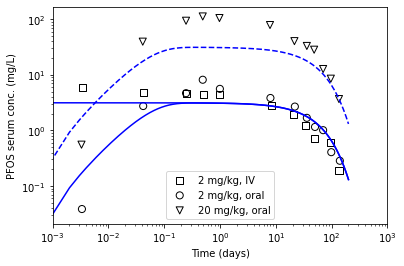

In [4]:
# Huang et al. Male rat PFOS
# Dosed mg/kg
# Reported conc: nM
MW = 538.22
conv = MW/1000000.
dosing_dict = {'chem': 'PFOS',
                   'tf': 200,
                   'sex': 'Male',
                   'route': 'IV',
                   'strain': 'rat',
                   'M_m_1': 0.24,
                   'Qcc': 12.39,
                   'dose': 2,
                   #'tz_daily': np.array([0]),
                   'tm_daily_dose': None, # None -> one dose
                   'sample_posterior': False,
                   'param_path': param_path,
                   'model_path': model_path,
                   'dev': False,
                   't_dose': 0.001,
               't_step': 0.001,
                   }

# Simulation 1
huang_pfos_male = PFAS_DR(**dosing_dict)
huang_pfos_male.run_model()
huang_pfos_male.plot_time_course(linestyle='-', color='blue')
time = np.array([0.003401495, 0.041867883, 0.254091656, 0.506307764, 0.991199852, 8.269255499, 20.73474298, 34.01495225, 49.30582984, 96.52613426, 135.0573531])
conc = np.array([11092.15877, 9082.373484, 8496.898887, 8310.251127, 8127.70338, 5212.448783, 3573.17809, 2291.546199, 1344.675101, 1125.762934, 346.8909151])*conv
huang_pfos_male.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='s')
#huang_pfos_male.calc_pk_params()

# Simulation 2
huang_pfos_male.update_p(dose=2, route='oral')
huang_pfos_male.run_model()
huang_pfos_male.plot_time_course(linestyle='-', color='blue')
time = np.array([0.003341891, 0.041867883, 0.245264853, 0.488719312, 0.991199852, 7.981992665, 21.86408394, 35.86761465, 50.18521808, 70.21811008, 98.24771461, 139.9179136])
conc = np.array([71.66472955, 5097.94914, 8687.738744, 15137.85387, 10377.12792, 7113.609683, 4985.964662, 3127.352596, 2143.826873, 1876.341556, 754.7680448, 529.0207036])*conv
huang_pfos_male.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='o')

# Simulation 3
huang_pfos_male.update_p(dose=20, route='oral')
huang_pfos_male.run_model()
huang_pfos_male.plot_time_course(linestyle='--', color='blue')
time = np.array([0.003283332, 0.041134238, 0.245264853, 0.488719312, 0.973831202, 7.842125374, 21.48096279, 35.86761465, 48.44185098, 70.21811008, 96.52613426, 135.0573531])
conc = np.array([1030.058135, 73274.31522, 174243.8892, 208126.7844, 194710.3635, 145877.1058, 74920.0521, 61345.30789, 52511.83983, 23604.25804, 15825.48079, 6804.518946])*conv
huang_pfos_male.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='v')

x_lim = list(huang_pfos_male.ax[0].get_xlim())
x_lim[0] = 0.0008
huang_pfos_male.ax[0].set_xlim(x_lim)

huang_pfos_male.ax[0].set_xlim(1e-3, 1e3)
huang_pfos_male.ax[0].set_yscale('log')
huang_pfos_male.ax[0].set_xscale('log')


### Female SD rat

As demonstrated below, the female-specific rat paramters do not fit the female PK data. All PFOS simulations use the male-specific parameters

current dose 2
current infant dose 0
Running adult model
current dose 2
current infant dose 0
Running adult model
current dose 20
current infant dose 0
Running adult model


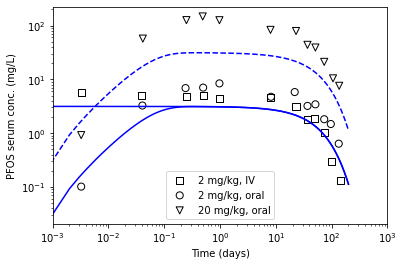

In [5]:
# Huang et al. Female PFOS using MALE parameters
# Dosed mg/kg
# Reported conc: nM
MW = 538.22
conv = MW/1000000.
dosing_dict = {'chem': 'PFOS',
                   'tf': 200,
                   'sex': 'Male', # <-- Changing this to female ruins the fits
                   'route': 'IV',
                   'strain': 'rat',
                   'M_m_1': 0.2,
                   'Qcc': 12.39,
                   'dose': 2,
                   #'tz_daily': np.array([0]),
                   'tm_daily_dose': None, # None -> one dose
                   'sample_posterior': False,
                   'param_path': param_path,
                   'model_path': model_path,
                   'dev': False,
                   't_dose':0.001,
                   't_step': 0.001
                   }

# Simulation 1
huang_pfos_female = PFAS_DR(**dosing_dict)
huang_pfos_female.run_model()
huang_pfos_female.plot_time_course(linestyle='-', color='blue')
time = np.array([0.003242262, 0.039774573, 0.249143582, 0.496881086, 0.990957952, 8.0048474, 22.95867105, 37.494235, 49.23882632, 73.4307074, 100, 141.2216823])
conc = np.array([10513.36323, 9326.388123, 8871.779603, 9481.485004, 8258.975755, 8405.35795, 5697.234865, 3374.154012, 3528.659711, 1908.684712, 546.5628928, 240.9945176])*conv
huang_pfos_female.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='s')
#huang_pfos_female.calc_pk_params()

# Simulation 2
huang_pfos_female.update_p(dose=2, route='oral')
huang_pfos_female.run_model()
huang_pfos_female.plot_time_course(linestyle='-', color='blue')
time = np.array([0.003242262, 0.040503735, 0.240253991, 0.496881086, 0.973118391, 8.151595175, 21.74092944, 36.81925109, 51.06070243, 73.4307074, 96.43194075, 133.7312])
conc = np.array([188.3784169, 6056.113705, 12762.75434, 13032.69577, 15604.91635, 8795.764456, 10765.60165, 5955.179995, 6370.152034, 3368.563366, 2743.70217, 1182.646714])*conv
huang_pfos_female.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='o')

# Simulation 3
huang_pfos_female.update_p(dose=20, route='oral')
huang_pfos_female.run_model()
huang_pfos_female.plot_time_course(linestyle='--', color='blue')
time = np.array([0.003242262,0.041246264, 0.249143582, 0.487936065, 0.973118391, 8.0048474, 22.95867105, 36.81925109, 51.06070243, 73.4307074, 105.6011479, 136.182809])
conc = np.array([1707.135466, 106070.7425, 233917.8566, 273792.8753, 233132.8916, 154068.5899, 146841.3383, 81238.76519, 72455.41532, 39195.31824, 19360.82482, 14076.46031])*conv
huang_pfos_female.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='v')


huang_pfos_female.ax[0].set_xlim(1e-3, 1e3)
huang_pfos_female.ax[0].set_yscale('log')
huang_pfos_female.ax[0].set_xscale('log')


current dose 2
current infant dose 0
Running adult model
current dose 2
current infant dose 0
Running adult model
current dose 20
current infant dose 0
Running adult model


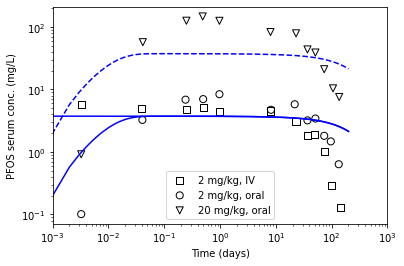

In [10]:
# Huang et al. Female PFOS using FEMALE parameters. Switching to MALE paramters works better.
# Dosed mg/kg
# Reported conc: nM
MW = 538.22
conv = MW/1000000.
dosing_dict = {'chem': 'PFOS',
                   'tf': 200,
                   'sex': 'Female',
                   'route': 'IV',
                   'strain': 'rat',
                   'M_m_1': 0.2,
                   'Qcc': 12.39,
                   'dose': 2,
                   #'tz_daily': np.array([0]),
                   'tm_daily_dose': None, # None -> one dose
                   'sample_posterior': False,
                   'param_path': param_path,
                   'model_path': model_path,
                   'dev': False,
                   't_dose':0.001,
                   't_step': 0.001
                   }

# Simulation 1
huang_pfos_female = PFAS_DR(**dosing_dict)
huang_pfos_female.run_model()
huang_pfos_female.plot_time_course(linestyle='-', color='blue')
time = np.array([0.003242262, 0.039774573, 0.249143582, 0.496881086, 0.990957952, 8.0048474, 22.95867105, 37.494235, 49.23882632, 73.4307074, 100, 141.2216823])
conc = np.array([10513.36323, 9326.388123, 8871.779603, 9481.485004, 8258.975755, 8405.35795, 5697.234865, 3374.154012, 3528.659711, 1908.684712, 546.5628928, 240.9945176])*conv
huang_pfos_female.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='s')
#huang_pfos_female.calc_pk_params()

# Simulation 2
huang_pfos_female.update_p(dose=2, route='oral')
huang_pfos_female.run_model()
huang_pfos_female.plot_time_course(linestyle='-', color='blue')
time = np.array([0.003242262, 0.040503735, 0.240253991, 0.496881086, 0.973118391, 8.151595175, 21.74092944, 36.81925109, 51.06070243, 73.4307074, 96.43194075, 133.7312])
conc = np.array([188.3784169, 6056.113705, 12762.75434, 13032.69577, 15604.91635, 8795.764456, 10765.60165, 5955.179995, 6370.152034, 3368.563366, 2743.70217, 1182.646714])*conv
huang_pfos_female.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='o')

# Simulation 3
huang_pfos_female.update_p(dose=20, route='oral')
huang_pfos_female.run_model()
huang_pfos_female.plot_time_course(linestyle='--', color='blue')
time = np.array([0.003242262,0.041246264, 0.249143582, 0.487936065, 0.973118391, 8.0048474, 22.95867105, 36.81925109, 51.06070243, 73.4307074, 105.6011479, 136.182809])
conc = np.array([1707.135466, 106070.7425, 233917.8566, 273792.8753, 233132.8916, 154068.5899, 146841.3383, 81238.76519, 72455.41532, 39195.31824, 19360.82482, 14076.46031])*conv
huang_pfos_female.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='v')


huang_pfos_female.ax[0].set_xlim(1e-3, 1e3)
huang_pfos_female.ax[0].set_yscale('log')
huang_pfos_female.ax[0].set_xscale('log')


## Kim, 2016, 3749289

This study used male and female SD rats with 2 mg/kg dosing IV and oral

### Male SD rat

current dose 2
current infant dose 0
Running adult model
current dose 2
current infant dose 0
Running adult model


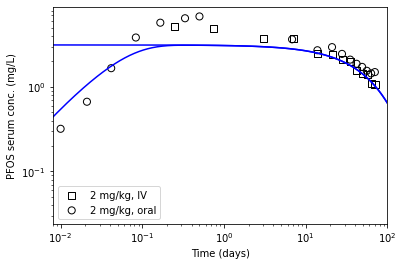

In [8]:
# Kim et al. Male PFOS
# Dosed mg/kg
# Reported conc: ng/ml

conv = 1/1000.
dosing_dict = {'chem': 'PFOS',
                   'tf': 200,
                   'sex': 'Male',
                   'route': 'IV',
                   'strain': 'rat',
                   'M_m_1': 0.24,
                   'Qcc': 12.39,
                   'dose': 2,
                   #'tz_daily': np.array([0]),
                   'tm_daily_dose': None, # None -> one dose
                   'sample_posterior': False,
                   'param_path': param_path,
                   'model_path': model_path,
                   'dev': False,
                   't_dose':0.001,
               't_step':0.001
                   }

# Simulation 1
huang_pfos_male = PFAS_DR(**dosing_dict)
huang_pfos_male.run_model()
huang_pfos_male.plot_time_course(linestyle='-', color='blue')
time_hrs = np.array([0.25, 0.1, ])
#time = np.array([0.262262614, 0.740468623, 3.037582456, 6.979827181, 14.07816768, 20.99953681, 28.10969669, 35.22273156, 42.13547573, 49.24723283, 56.2657126, 63.27460908, 70.38860228])
time = np.array([0.25, 0.75, 3, 7, 14.07816768, 20.99953681, 28.10969669, 35.22273156, 42.13547573, 49.24723283, 56.2657126, 63.27460908, 70.38860228])
conc = np.array([5178.95767, 4870.626777, 3780.669556, 3774.973108, 2509.891811, 2409.317177, 2125.968087, 2009.64506, 1569.129441, 1438.575188, 1412.935012, 1103.178085, 1067.025659])*conv
huang_pfos_male.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='s')

# Simulation 2
huang_pfos_male.update_p(dose=2, route='oral')
huang_pfos_male.run_model()
huang_pfos_male.plot_time_course(linestyle='-', color='blue')
#time = np.array([0.090842491, 0.152520495, 0.116518402, 0.264992151, 0.339787197, 0.153636839, 0.423792081, 6.797557998, 13.88410954, 20.95559044, 27.76556777, 34.93724054, 41.83512995, 48.91330891, 55.81091924, 63.06994593, 70.05267748])
time = np.array([0.01, 0.021, 0.0416, 0.0833, 0.166, 0.333, 0.5, 6.797557998, 13.88410954, 20.95559044, 27.76556777, 34.93724054, 41.83512995, 48.91330891, 55.81091924, 63.06994593, 70.05267748])
conc = np.array([319.6063391, 667.7522878, 1665.476317, 3842.513346, 5754.399373, 6490.941459, 6820.970227, 3656.595522, 2715.477157, 2956.441097, 2459.060596, 2104.151098, 1878.651198, 1725.532235, 1551.562344, 1445.439771, 1497.561324])*conv
huang_pfos_male.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='o')


huang_pfos_male.ax[0].set_xlim(0.008, 1e2)
huang_pfos_male.ax[0].set_xscale('log')
huang_pfos_male.ax[0].set_yscale('log')

### Female SD rat

As demonstrated below, the female-specific rat paramters do not fit the female PK data. All PFOS simulations use the male-specific parameters

current dose 2
current infant dose 0
Running adult model
current dose 2
current infant dose 0
Running adult model


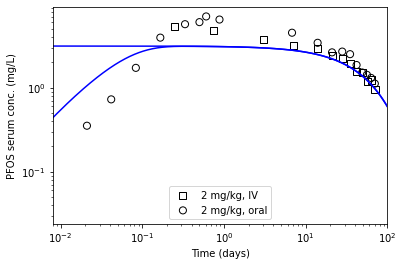

In [9]:
# Kim et al. Female PFOS using MALE parameters
# Dosed mg/kg
# Reported conc: ng/ml

conv = 1/1000.
dosing_dict = {'chem': 'PFOS',
                   'tf': 200,
                   'sex': 'Male',
                   'route': 'IV',
                   'strain': 'rat',
                   'M_m_1': 0.2,
                   'Qcc': 12.39,
                   'dose': 2,
                   #'tz_daily': np.array([0]),
                   'tm_daily_dose': None, # None -> one dose
                   'sample_posterior': False,
                   'param_path': param_path,
                   'model_path': model_path,
                   'dev': False,
                   't_dose':0.001,
                   't_step': 0.001
                   }

# Simulation 1
huang_pfos_male = PFAS_DR(**dosing_dict)
huang_pfos_male.run_model()
huang_pfos_male.plot_time_course(linestyle='-', color='blue')
#time = np.array([0.167068632, 0.932453801, 3.03694357, 6.87696657, 14.08455653, 21.09536968, 28.20744621, 35.12562092, 42.13515629, 49.15363606, 56.35451772, 63.37555304, 70.19150601])
time = np.array([0.25, 0.75, 3, 7, 14.07816768, 20.99953681, 28.10969669, 35.22273156, 42.13547573, 49.24723283, 56.2657126, 63.27460908, 70.38860228])
conc = np.array([5299.378649, 4833.15476, 3723.268088, 3214.870672, 2924.819861, 2390.869097, 2208.776633, 1964.123147, 1557.171925, 1529.417962, 1184.937585, 1237.265049, 951.4231539])*conv
huang_pfos_male.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='s')

# Simulation 2
huang_pfos_male.update_p(dose=2, route='oral')
huang_pfos_male.run_model()
huang_pfos_male.plot_time_course(linestyle='-', color='blue')
#time = np.array([0.086935287, 0.058468516, 0.156985871, 0.008233037, 0.022745508, 0.519239491, 0.603802547, 0.879260422, 6.789185418, 13.96560265, 20.96005582, 27.94334554, 34.83956044, 41.83540904, 49.00903541, 55.99567417, 62.98315018, 69.97341706])
time = np.array([0.021, 0.0416, 0.0833, 0.166, 0.333, 0.5, 0.603802547, 0.879260422, 6.789185418, 13.96560265, 20.96005582, 27.94334554, 34.83956044, 41.83540904, 49.00903541, 55.99567417, 62.98315018, 69.97341706])
conc = np.array([352.9330325, 727.0067808, 1725.532235, 3952.965982, 5713.774242, 6046.979016, 7066.92967, 6490.941459, 4522.562896, 3430.714795, 2639.602078, 2696.306327, 2511.886432, 1865.388224, 1518.932454, 1425.10267, 1308.950059, 1120.032873])*conv
huang_pfos_male.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='o')
#time = np.array([0.01, 0.021, 0.0416, 0.0833, 0.166, 0.333, 0.5, 6.797557998, 13.88410954, 20.95559044, 27.76556777, 34.93724054, 41.83512995, 48.91330891, 55.81091924, 63.06994593, 70.05267748])

huang_pfos_male.ax[0].set_xlim(0.008, 1e2)
huang_pfos_male.ax[0].set_yscale('log')
huang_pfos_male.ax[0].set_xscale('log')
huang_pfos_male.ax[0].legend(loc='lower center')

current dose 2
current infant dose 0
Running adult model
current dose 2
current infant dose 0
Running adult model


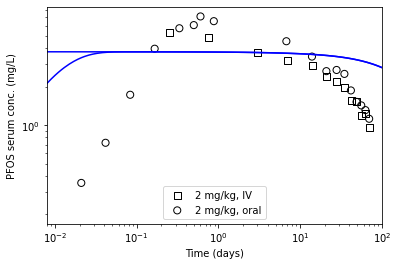

In [11]:
# Kim et al. Female PFOS using FEMALE parameters. Using MALE parameters works better.
# Dosed mg/kg
# Reported conc: ng/ml

conv = 1/1000.
dosing_dict = {'chem': 'PFOS',
                   'tf': 200,
                   'sex': 'Female',
                   'route': 'IV',
                   'strain': 'rat',
                   'M_m_1': 0.2,
                   'Qcc': 12.39,
                   'dose': 2,
                   #'tz_daily': np.array([0]),
                   'tm_daily_dose': None, # None -> one dose
                   'sample_posterior': False,
                   'param_path': param_path,
                   'model_path': model_path,
                   'dev': False,
                   't_dose':0.001,
                   't_step': 0.001
                   }

# Simulation 1
huang_pfos_male = PFAS_DR(**dosing_dict)
huang_pfos_male.run_model()
huang_pfos_male.plot_time_course(linestyle='-', color='blue')
#time = np.array([0.167068632, 0.932453801, 3.03694357, 6.87696657, 14.08455653, 21.09536968, 28.20744621, 35.12562092, 42.13515629, 49.15363606, 56.35451772, 63.37555304, 70.19150601])
time = np.array([0.25, 0.75, 3, 7, 14.07816768, 20.99953681, 28.10969669, 35.22273156, 42.13547573, 49.24723283, 56.2657126, 63.27460908, 70.38860228])
conc = np.array([5299.378649, 4833.15476, 3723.268088, 3214.870672, 2924.819861, 2390.869097, 2208.776633, 1964.123147, 1557.171925, 1529.417962, 1184.937585, 1237.265049, 951.4231539])*conv
huang_pfos_male.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='s')

# Simulation 2
huang_pfos_male.update_p(dose=2, route='oral')
huang_pfos_male.run_model()
huang_pfos_male.plot_time_course(linestyle='-', color='blue')
#time = np.array([0.086935287, 0.058468516, 0.156985871, 0.008233037, 0.022745508, 0.519239491, 0.603802547, 0.879260422, 6.789185418, 13.96560265, 20.96005582, 27.94334554, 34.83956044, 41.83540904, 49.00903541, 55.99567417, 62.98315018, 69.97341706])
time = np.array([0.021, 0.0416, 0.0833, 0.166, 0.333, 0.5, 0.603802547, 0.879260422, 6.789185418, 13.96560265, 20.96005582, 27.94334554, 34.83956044, 41.83540904, 49.00903541, 55.99567417, 62.98315018, 69.97341706])
conc = np.array([352.9330325, 727.0067808, 1725.532235, 3952.965982, 5713.774242, 6046.979016, 7066.92967, 6490.941459, 4522.562896, 3430.714795, 2639.602078, 2696.306327, 2511.886432, 1865.388224, 1518.932454, 1425.10267, 1308.950059, 1120.032873])*conv
huang_pfos_male.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='o')
#time = np.array([0.01, 0.021, 0.0416, 0.0833, 0.166, 0.333, 0.5, 6.797557998, 13.88410954, 20.95559044, 27.76556777, 34.93724054, 41.83512995, 48.91330891, 55.81091924, 63.06994593, 70.05267748])

huang_pfos_male.ax[0].set_xlim(0.008, 1e2)
huang_pfos_male.ax[0].set_yscale('log')
huang_pfos_male.ax[0].set_xscale('log')
huang_pfos_male.ax[0].legend(loc='lower center')

# PFOA

Compare PK model to out-of-sample PFOA datasets

## Dzierlenga, 2020, 5916078

### Male SD rat

current dose 6
current infant dose 0
Running adult model
current dose 6
current infant dose 0
Running adult model
current dose 12
current infant dose 0
Running adult model
current dose 45
current infant dose 0
Running adult model


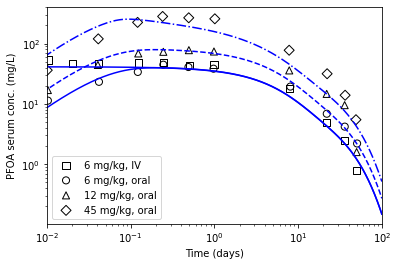

In [8]:
# Male Dzierlenga PFOA
# Dosed mg/kg
# Reported conc: uM
MW = 414.07
conv = MW/1000

dosing_dict = {'chem': 'PFOA',
                   'tf': 100,
                   'sex': 'Male',
                   'route': 'IV',
                   'strain': 'rat',
                   'M_m_1': 0.24,
                   'Qcc': 12.39,
                   'dose': 6,
                   #'tz_daily': np.array([0]),
                   'tm_daily_dose': None, # None -> one dose
                   'sample_posterior': False,
                   'param_path': param_path,
                   'model_path': model_path,
                   'dev': False,
                   't_dose':0.001,
                   't_step': 0.001
                   }

# Simulation 1 Male 6 mg/kg IV
pfoa_male = PFAS_DR(**dosing_dict)
pfoa_male.run_model()
pfoa_male.plot_time_course(linestyle='-', color='blue')
time = np.array([0.003350721, 0.010335266, 0.020035163, 0.041070489, 0.123103554, 0.248806426, 0.503060318, 0.988559537, 7.958667148, 22.01310252, 36.09989761, 50.07842563])
conc = np.array([148.5994454, 129.1835232, 112.3616518, 112.2732994, 115.0039968, 117.8519964, 106.4550454, 107.7269059, 43.88240202, 11.80166191, 6.043614934, 1.868753287])*conv
pfoa_male.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='s')
#pfoa_male.calc_pk_params(phase='alpha')
#pfoa_male.calc_pk_params(phase='beta')

# Simulation 2 Male 6 mg/kg oral
pfoa_male.update_p(dose=6, route='oral')
pfoa_male.run_model()
pfoa_male.plot_time_course(linestyle='-', color='blue')
time = np.array([0.01023927, 0.041741055, 0.121509507, 0.24539535, 0.489210264, 0.975194625, 8.069917575, 21.99019596, 36.04286969, 50.62595089])
conc = np.array([27.36774176, 56.09174028, 81.8038854, 107.8915295, 98.69674375, 92.59280485, 46.73917531, 16.59162296, 10.13806502, 5.325266108])*conv
pfoa_male.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='o')

# Simulation 3 Male 12 mg/kg oral
pfoa_male.update_p(dose=12, route='oral')
pfoa_male.run_model()
pfoa_male.plot_time_course(linestyle='--', color='blue')
time = np.array([0.010226643, 0.040502737, 0.12296597, 0.245026589, 0.495169603, 0.987035944, 7.831113858, 21.93937779, 35.95264414, 49.96847713])
conc = np.array([40.98094948, 106.7493655, 165.8126178, 176.4764242, 187.8231486, 178.4444326, 86.73382361, 35.37179459, 23.02081256, 3.836028126])*conv
pfoa_male.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='^')

# Simulation 4 Male 45 mg/kg oral
pfoa_male.update_p(dose=45, route='oral')
pfoa_male.run_model()
pfoa_male.plot_time_course(linestyle='-.', color='blue')
time = np.array([0.010060413, 0.040951883, 0.120808718, 0.240607324, 0.49330193, 1.011346649, 7.812715304, 22.19807207, 36.42008286, 49.08428422])
conc = np.array([87.36891437, 289.2256235, 542.8683129, 680.7642293, 646.7511603, 622.2389253, 187.2561919, 76.36565666, 33.61228695, 13.20920199])*conv
pfoa_male.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='D')



pfoa_male.ax[0].set_xlim(1e-2, 1e2)
pfoa_male.ax[0].set_xscale('log')
pfoa_male.ax[0].set_yscale('log')

### Female SD rat

current dose 40
current infant dose 0
Running adult model
current dose 40
current infant dose 0
Running adult model
current dose 80
current infant dose 0
Running adult model
current dose 320
current infant dose 0
Running adult model


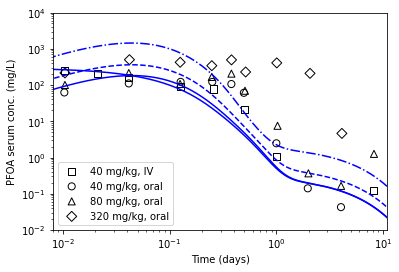

In [13]:
# Female Dzierlenga PFOA
# Dosed mg/kg
# Reported conc: uM
MW = 414.07
conv = MW/1000

dosing_dict = {'chem': 'PFOA',
                   'tf': 100,
                   'sex': 'Female',
                   'route': 'IV',
                   'strain': 'rat',
                   'M_m_1': 0.2,
                   'Qcc': 12.39,
                   'dose': 40,
                   #'tz_daily': np.array([0]),
                   'tm_daily_dose': None, # None -> one dose
                   'sample_posterior': False,
                   'param_path': param_path,
                   'model_path': model_path,
                   'dev': False,
                   't_dose':0.001,
               't_step':0.001
                   }

# Simulation 1 Female 40 mg/kg IV
pfoa_female = PFAS_DR(**dosing_dict)
pfoa_female.run_model()
pfoa_female.plot_time_course(linestyle='-', color='blue')
time = np.array([0.003450038, 0.010310681, 0.020896431, 0.041358809, 0.126487036, 0.256360075, 0.506457238, 1.009567001, 8.184744649])
conc = np.array([824.9449339, 596.7073352, 507.0289165, 397.9975999, 215.1406783, 187.7102663, 49.78241954, 2.558573417, 0.288566397])*conv
pfoa_female.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='s')
#pfoa_female.calc_pk_params()

# Simulation 2 Female 40 mg/kg oral
pfoa_female.update_p(dose=40, route='oral')
pfoa_female.run_model()
pfoa_female.plot_time_course(linestyle='-', color='blue')
time = np.array([0.010286515, 0.041330823, 0.126555548, 0.250584079, 0.378339656, 0.495582789, 0.999188067, 1.968806141, 4.030310026])
conc = np.array([150.6836335, 267.5890572, 295.5644635, 294.4063706, 257.3046382, 147.3650663, 5.968150523, 0.341010388, 0.103213878])*conv
pfoa_female.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='o')

# Simulation 3 Female 80 mg/kg oral
pfoa_female.update_p(dose=80, route='oral')
pfoa_female.run_model()
pfoa_female.plot_time_course(linestyle='--', color='blue')
time = np.array([0.010416842, 0.041377477, 0.125045527, 0.2477842, 0.378766718, 0.507509625, 1.024944684, 1.995370363, 4.03959611, 8.21768223])
conc = np.array([242.6225772, 518.5872745, 258.9470168, 404.4885972, 498.6560827, 168.1924325, 18.13572261, 0.884152666, 0.398051483, 3.042455527])*conv
pfoa_female.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='^')

# Simulation 4 Female 320 mg/kg oral
pfoa_female.update_p(dose=320, route='oral')
pfoa_female.run_model()
pfoa_female.plot_time_course(linestyle='-.', color='blue')
time = np.array([0.010430482, 0.041928196, 0.125339296, 0.248086283, 0.379331178, 0.514566165, 1.007928265, 2.065176054, 4.110761819])
conc = np.array([522.7105655, 1209.497421, 1025.430438, 826.5099184, 1194.284371, 553.3671392, 986.7538617, 507.0632377, 11.17304429])*conv
pfoa_female.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='D')



pfoa_female.ax[0].set_xlim(0.008, 1+1e1)
pfoa_female.ax[0].set_ylim(1e-2, 1e4)
pfoa_female.ax[0].set_xscale('log')
pfoa_female.ax[0].set_yscale('log')

## Kim, 2016, 3749289 and Kudo, 2002, 2990271

## Male SD rat

current dose 1
current infant dose 0
Running adult model
current dose 1
current infant dose 0
Running adult model
current dose 20
current infant dose 0
Running adult model


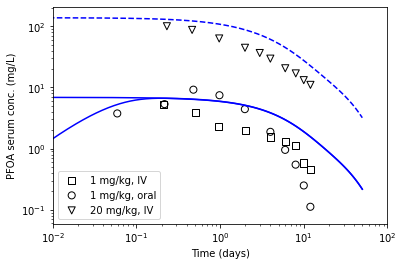

In [14]:
# Male PFOA
# Dosed mg/kg
# Reported conc: ng/ml


dosing_dict = {'chem': 'PFOA',
                   'tf': 50,
                   'sex': 'Male',
                   'route': 'IV',
                   'strain': 'rat',
                   'M_m_1': 0.24,
                   'Qcc': 12.39,
                   'dose': 1,
                   #'tz_daily': np.array([0]),
                   'tm_daily_dose': None, # None -> one dose
                   'sample_posterior': False,
                   'param_path': param_path,
                   'model_path': model_path,
                   'dev': False,
                   't_dose':0.001,
                   't_step':0.001,
                   }

# Simulation 1 2 mg/kg IV
conv = 1/1000.
pfoa_male = PFAS_DR(**dosing_dict)
pfoa_male.run_model()
pfoa_male.plot_time_course(linestyle='-', color='blue')
time = np.array([0.211438475, 0.502599653, 0.960138648, 2, 3.982668977, 5.993067591, 7.975736568, 9.972270364, 11.9965338])
conc = np.array([5225.617069, 3949.808245, 2289.618591, 2008.64902, 1545.639183, 1318.88277, 1125.335583, 581.3267391, 454.0126425])*conv
pfoa_male.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='s')
#pfoa_male.calc_pk_params()
# Simulation 2
conv = 1/1000.
pfoa_male.update_p(dose=1, route='oral')
pfoa_male.run_model()
pfoa_male.plot_time_course(linestyle='-', color='blue')
time = np.array([0.059076397, 0.21674753, 0.479650067, 0.982729581, 1.975967219, 3.988335554, 5.986978054, 7.985268609, 9.997435833, 11.98320722])
conc = np.array([3751.652285, 5326.76714, 9171.810312, 7441.809078, 4410.479258, 1878.343894, 953.0090196, 546.575951, 249.6651372, 112.0561332])*conv
pfoa_male.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='o')

# Simulation 3 Kudo 20 mg/kg (nmol/ml)
MW = 414.07
conv = MW/1000
pfoa_male.update_p(dose=20, route='IV')
pfoa_male.run_model()
pfoa_male.plot_time_course(linestyle='--', color='blue')
time = np.array([0.2, 5.555555556, 11.11111111, 23.41269841, 47.61904762, 71.42857143, 95.63492063,144.047619, 192.4603175, 239.6825397, 288.0952381])/24.
conc = np.array([348.1817631, 240.792254, 209.8038494, 152.1136101, 107.1373928, 88.01914832, 71.21161428, 49.57400672, 40.88234578, 31.69436899, 26.54317429])*conv
pfoa_male.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='v')



pfoa_male.ax[0].set_xlim(1e-2, 1e2)
pfoa_male.ax[0].set_xscale('log')
pfoa_male.ax[0].set_yscale('log')

## Female SD rat

current dose 1
current infant dose 0
Running adult model
current dose 1
current infant dose 0
Running adult model
current dose 20
current infant dose 0
Running adult model


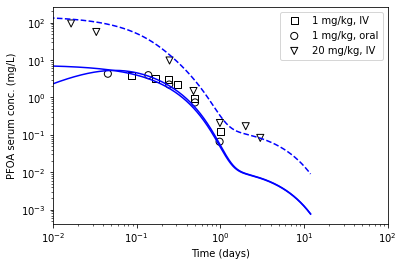

In [15]:
# Female PFOA
# Dosed mg/kg
# Reported conc: ng/ml


dosing_dict = {'chem': 'PFOA',
                   'tf': 12,
                   'sex': 'Female',
                   'route': 'IV',
                   'strain': 'rat',
                   'M_m_1': 0.2,
                   'Qcc': 12.39,
                   'dose': 1,
                   #'tz_daily': np.array([0]),
                   'tm_daily_dose': None, # None -> one dose
                   'sample_posterior': False,
                   'param_path': param_path,
                   'model_path': model_path,
                   'dev': False,
                   't_dose':0.001,
                   't_step': 0.001
                   }

# Simulation 1
conv = 1/1000.
pfoa_female = PFAS_DR(**dosing_dict)
pfoa_female.run_model()
pfoa_female.plot_time_course(linestyle='-', color='blue')
time = np.array([0.0003812825, 0.003466205, 0.086655113, 0.169844021, 0.239168111, 0.308492201, 0.488734835, 1.001733102])
conc = np.array([5706.885337, 4780.897126, 3888.950961, 3306.635348, 3026.776223, 2253.360793, 957.5915102, 123.1872336])*conv
pfoa_female.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='s')
#pfoa_female.calc_pk_params()
# Simulation 2
conv = 1/1000.
pfoa_female.update_p(dose=1, route='oral')
pfoa_female.run_model()
pfoa_female.plot_time_course(linestyle='-', color='blue')
time = np.array([0.004625556, 0.006385279, 0.006234445, 0.045451117, 0.138263908, 0.245707534, 0.500113125, 0.983081525])
conc = np.array([1618.612967, 2987.452702, 3686.105721, 4315.649143, 3954.681764, 2219.540651, 736.915144, 65.83349614])*conv
pfoa_female.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='o')

# Simulation 3 Kudo 20 mg/kg (nmol/ml)
MW = 414.07
conv = MW/1000
pfoa_female.update_p(dose=20, route='IV')
pfoa_female.run_model()
pfoa_female.plot_time_course(linestyle='--', color='blue')
time = np.array([0.05, 0.396825397, 0.793650794, 5.952380952, 11.50793651, 23.80952381, 48.41269841, 72.22222222])/24
conc = np.array([317.4477409, 229.7087137, 136.0919231, 23.53074139, 3.597109912, 0.501867723, 0.412361814, 0.200673387])*conv
pfoa_female.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='v')



pfoa_female.ax[0].set_xlim(1e-2, 1e2)
pfoa_female.ax[0].set_xscale('log')
pfoa_female.ax[0].set_yscale('log')